In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np

In [3]:
churn_data=pd.read_csv("/home/sathish/Downloads/churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data=pd.read_csv("/home/sathish/Downloads/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data=pd.read_csv("/home/sathish/Downloads/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df_1=pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [7]:
telecom=pd.merge(df_1,internet_data,how='inner',on='customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents','InternetService']

def binary_map(x):
    return x.map({'Yes':1,"No":0})

telecom[varlist]=telecom[varlist].apply(binary_map)

In [10]:
dummy1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],dtype=int, drop_first=True)

telecom=pd.concat([telecom,dummy1],axis=1)

telecom=telecom.drop(['Contract','PaymentMethod','gender','InternetService'],axis=1)

In [11]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0


In [12]:
ml=pd.get_dummies(telecom['MultipleLines'],dtype=int,prefix='ML')

ml1=ml.drop(['ML_No phone service'],axis=1)

telecom=pd.concat([telecom,ml1],axis=1)
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_No,ML_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,0,1,1,Yes,Yes,No,Yes,Yes,Yes,Yes,1,0,0,0,1,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.9,0,0,1,1,Yes,No,Yes,Yes,No,Yes,Yes,1,0,1,0,0,0,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,No phone service,Yes,No,No,No,No,No,0,0,0,1,0,0,0,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,1,1,0,Yes,No,No,No,No,No,No,0,0,0,0,1,1,0,1


In [13]:


os=pd.get_dummies(telecom['OnlineSecurity'],dtype=int,prefix='OS')

os1=os.drop(['OS_No internet service'],axis=1)

telecom=pd.concat([telecom,os1],axis=1)


ob=pd.get_dummies(telecom['OnlineBackup'],dtype=int,prefix='OnlineBackup')

ob1=ob.drop(['OnlineBackup_No internet service'],axis=1)

telecom=pd.concat([telecom,ob1],axis=1)


dp=pd.get_dummies(telecom['DeviceProtection'],dtype=int,prefix='DeviceProtection')

dp1=dp.drop(['DeviceProtection_No internet service'],axis=1)

telecom=pd.concat([telecom,dp1],axis=1)


ts=pd.get_dummies(telecom['TechSupport'],dtype=int,prefix='TechSupport')

ts1=ts.drop(['TechSupport_No internet service'],axis=1)

telecom=pd.concat([telecom,ts1],axis=1)


st=pd.get_dummies(telecom['StreamingTV'],dtype=int,prefix='StreamingTV')

st1=st.drop(['StreamingTV_No internet service'],axis=1)

telecom=pd.concat([telecom,st1],axis=1)


sm=pd.get_dummies(telecom['StreamingMovies'],dtype=int,prefix='StreamingMovies')

sm1=sm.drop(['StreamingMovies_No internet service'],axis=1)

telecom=pd.concat([telecom,sm1],axis=1)


telecom=telecom.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)


In [14]:
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_No,ML_Yes,OS_No,OS_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.9,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [15]:
#telecom = telecom.loc[:, ~telecom.columns.duplicated()]

In [16]:
telecom.head(100)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_No,ML_Yes,OS_No,OS_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,12,1,1,78.95,927.35,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
96,9803-FTJCG,71,1,1,66.85,4748.7,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0
97,0278-YXOOG,5,1,0,21.05,113.85,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98,3212-KXOCR,52,1,0,21.00,1107.2,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_No,ML_Yes,OS_No,OS_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.9,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [18]:
telecom['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [19]:
telecom=telecom[telecom['TotalCharges']!=" "]

In [20]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'])

In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   int64  
 11  Contract_

In [22]:
num_telecom=telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [23]:
num_telecom.describe(percentiles=[0.25,0.5,0.75,0.90,0.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
99%,72.000000,114.734500,1.000000,8039.883000
max,72.000000,118.750000,1.000000,8684.800000


In [24]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
ML_No                                    0
ML_Yes                                   0
OS_No                                    0
OS_Yes                                   0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProtection_No                      0
DeviceProte

In [25]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   int64  
 11  Contract_

In [26]:
telecom=telecom.drop(['customerID'],axis=1)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

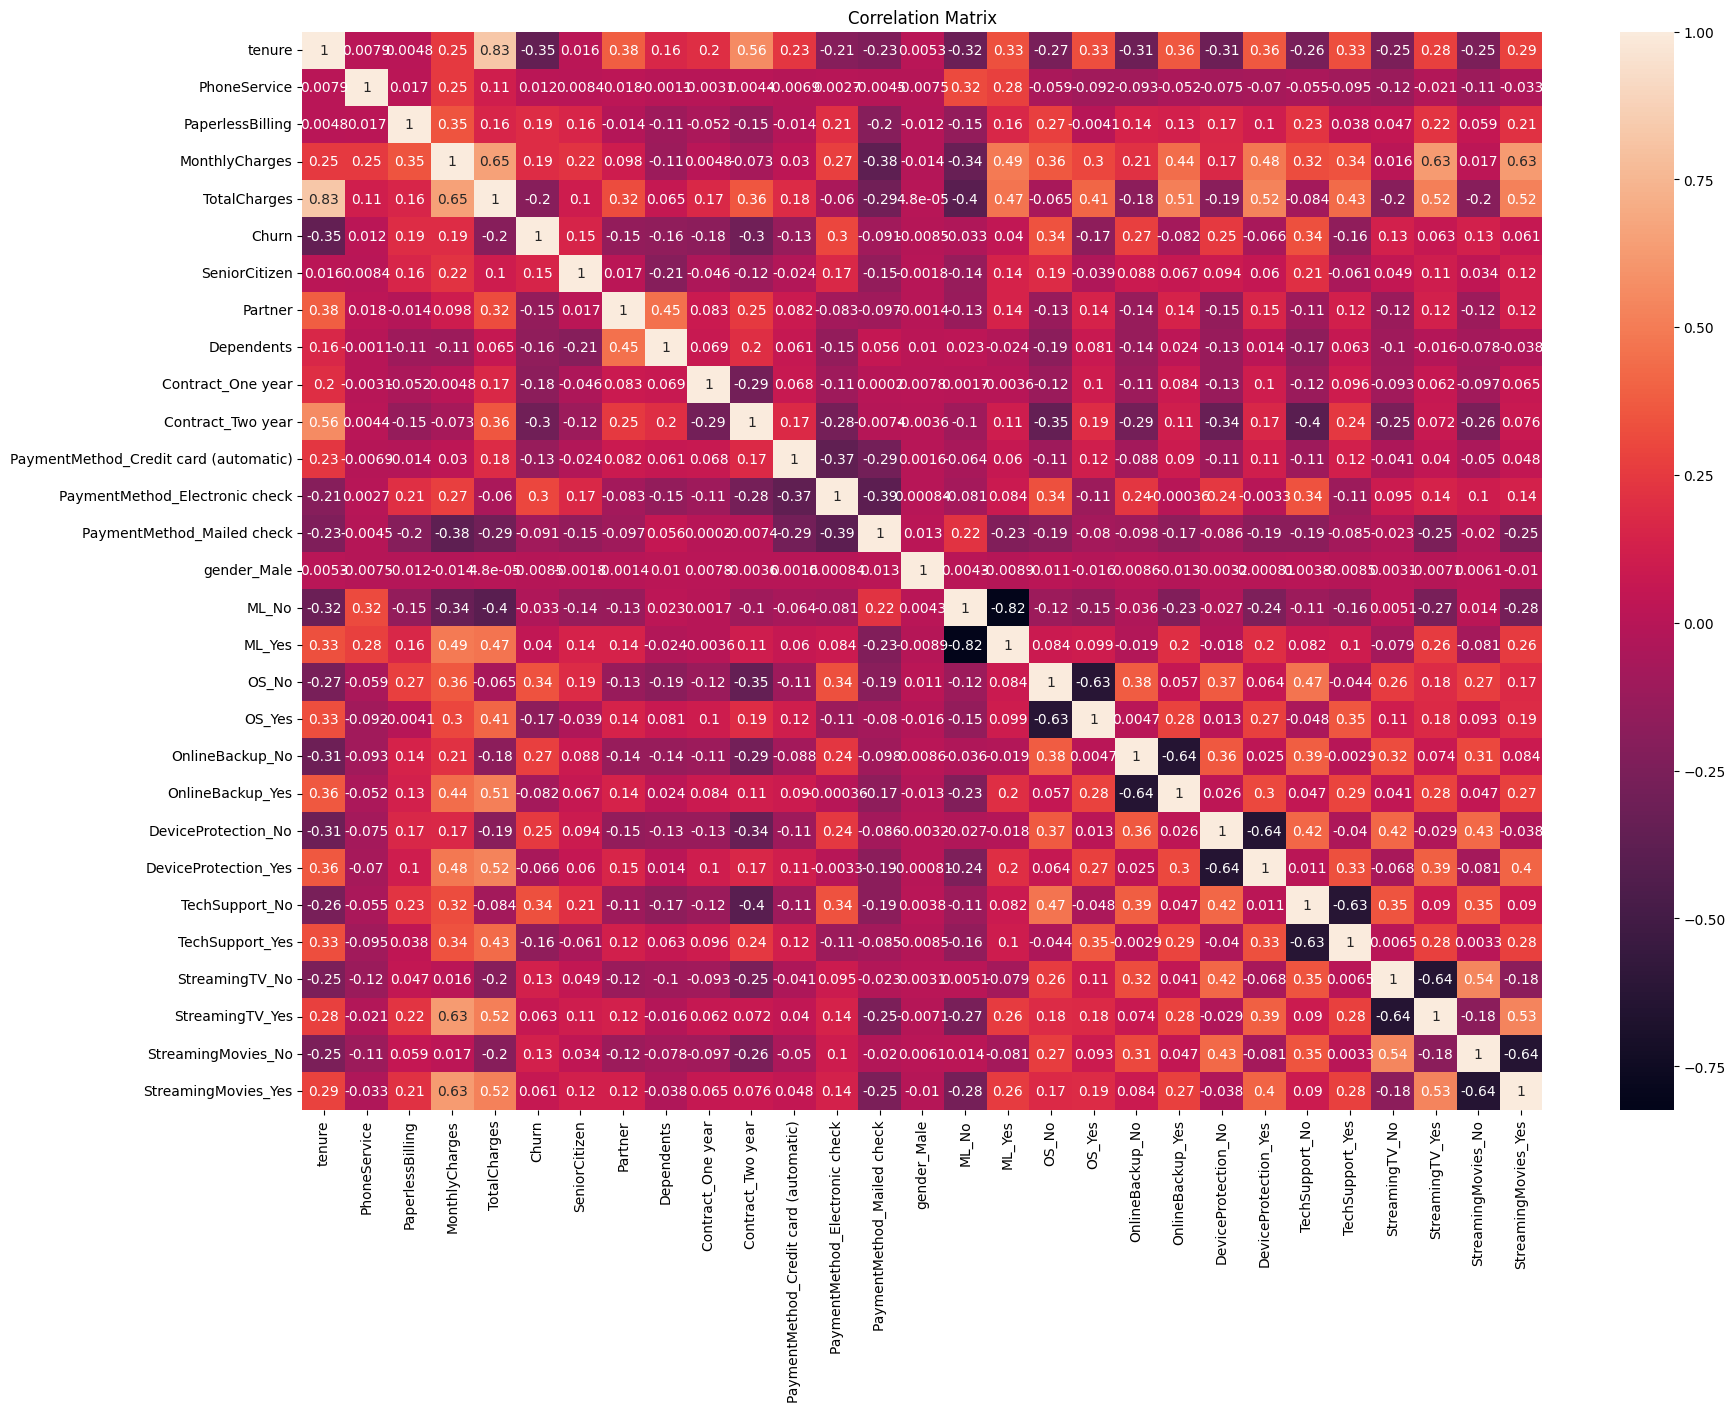

In [28]:
correlation_matrix=telecom.corr()
plt.figure(figsize=(20,14))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [29]:
import statsmodels.api as sm

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=telecom.drop(['Churn'],axis=1)
x.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_No,ML_Yes,OS_No,OS_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [32]:
y=telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_No,ML_Yes,OS_No,OS_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [35]:
churn=(sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

In [36]:
x_test=x_test.drop(['ML_No','OS_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingMovies_No'],axis=1)
x_train=x_train.drop(['ML_No','OS_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingMovies_No'],axis=1)

In [37]:
x_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,ML_Yes,OS_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_Yes
942,24,1,1,79.85,2001.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3730,57,1,1,104.50,5921.35,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1
1761,58,1,1,24.45,1513.60,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0
2283,1,1,1,71.55,71.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1872,41,1,0,19.70,804.25,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,63,1,0,68.80,4111.35,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0
3508,70,1,1,113.65,7939.25,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1
6765,69,1,1,25.60,1673.40,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3598,1,1,0,46.30,46.30,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


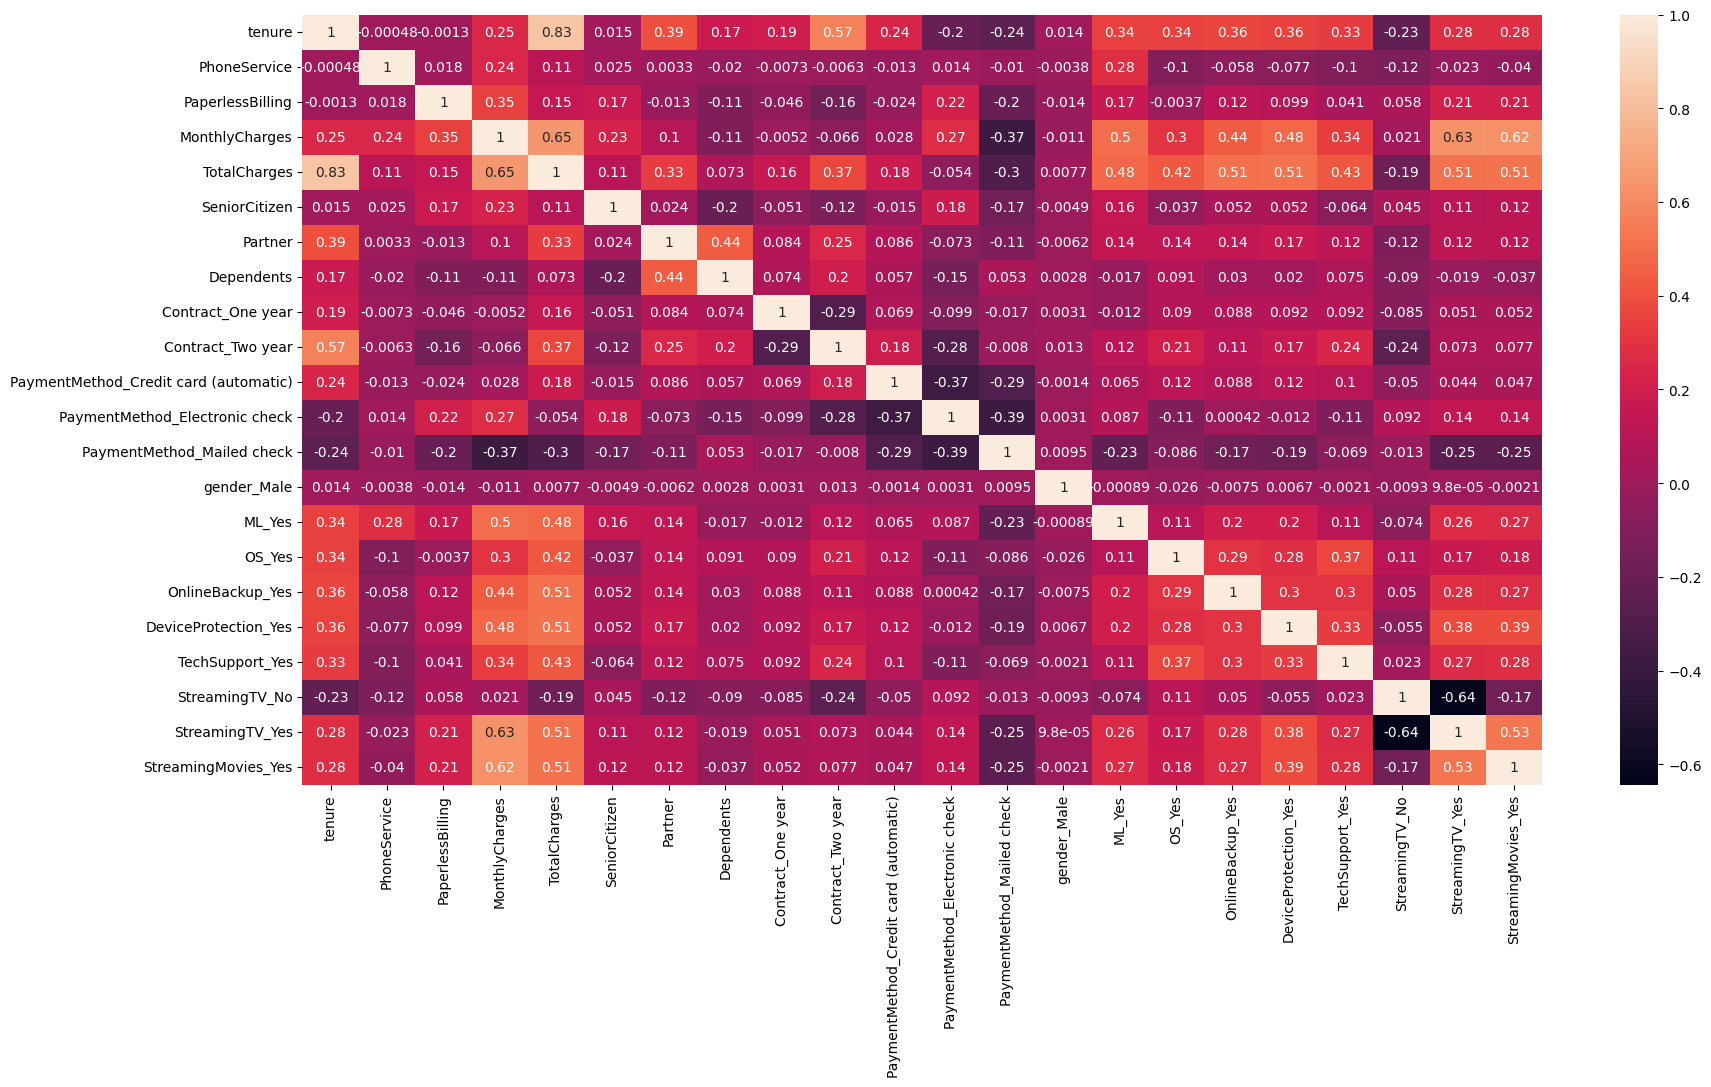

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),annot=True)
plt.show()
           

In [39]:
import statsmodels.api as sm

In [40]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.1
Date:                Fri, 09 Aug 2024   Deviance:                       4016.2
Time:                        10:20:46   Pearson chi2:                 6.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2776      0.418     -0.664      0.507      -1.097       0.542
tenure                                   -1.5016      0.188     -7.972      0.000      -1.871      -1.132
PhoneService                             -1.0262      0.212     -4.852      0.000      -1.441      -0.612
PaperlessBilling                          0.3338      0.090      3.711      0.000       0.157       0.510
MonthlyCharges                            0.8131      0.142      5.737      0.000       0.535       1.091
TotalCharges                              0.7172      0.197      3.641      0.000       0.331       1.103
SeniorCitizen                             0.3934      0.101      3.879      0.000       0.195       0.592
Partner                                   0.0466      0.093      0.498      0.619      -0.137       0.230
Dependents                               -0.1505      0.107     -1.406      0.160      -0.360       0.059
Contract_One year                        -0.6706      0.129     -5.209      0.000      -0.923      -0.418
Contract_Two year                        -1.2481      0.212     -5.885      0.000      -1.664      -0.832
PaymentMethod_Credit card (automatic)    -0.2573      0.137     -1.882      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1638      0.113      1.455      0.146      -0.057       0.384
PaymentMethod_Mailed check               -0.2541      0.137     -1.850      0.064      -0.523       0.015
gender_Male                              -0.0365      0.078     -0.466      0.641      -0.190       0.117
ML_Yes                                    0.0714      0.100      0.712      0.477      -0.125       0.268
OS_Yes                                   -0.5203      0.103     -5.072      0.000      -0.721      -0.319
OnlineBackup_Yes                         -0.3194      0.094     -3.394      0.001      -0.504      -0.135
DeviceProtection_Yes                     -0.1759      0.097     -1.807      0.071      -0.367       0.015
TechSupport_Yes                          -0.5290      0.101     -5.232      0.000      -0.727      -0.331
StreamingTV_No                            0.2986      0.233      1.282      0.200      -0.158       0.755
StreamingTV_Yes                           0.2685      0.283      0.949      0.343      -0.286       0.823
StreamingMovies_Yes                      -0.1415      0.108     -1.309      0.191      -0.353       0.070
=========================================================================================================
"""

### Feature Selection Using RFE

In [41]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=10)

In [43]:
lm=rfe.fit(x_train, y_train)

In [44]:
col=rfe.support_col=x_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Mailed check', 'OS_Yes', 'TechSupport_Yes'],
      dtype='object')

In [45]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', False, 3),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 12),
 ('Dependents', False, 10),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 13),
 ('ML_Yes', False, 11),
 ('OS_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No', False, 5),
 ('StreamingTV_Yes', False, 6),
 ('StreamingMovies_Yes', False, 9)]

In [46]:
col=x_train.columns[rfe.support_]

In [47]:
x_train.columns[~rfe.support_]

Index(['PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'gender_Male', 'ML_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [48]:
col

Index(['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Mailed check', 'OS_Yes', 'TechSupport_Yes'],
      dtype='object')

In [49]:
lm

RFE(estimator=LogisticRegression(), n_features_to_select=10)

### Assessing the model with StatsModels

In [50]:
x_train_sm=sm.add_constant(x_train[col])
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.8
Date:                Fri, 09 Aug 2024   Deviance:                       4069.6
Time:                        10:20:49   Pearson chi2:                 6.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2756
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0374      0.149      0.252      0.801      -0.254       0.329
tenure                        -1.4681      0.182     -8.048      0.000      -1.826      -1.111
PhoneService                  -1.0265      0.150     -6.824      0.000      -1.321      -0.732
MonthlyCharges                 0.8940      0.075     11.988      0.000       0.748       1.040
TotalCharges                   0.5746      0.189      3.043      0.002       0.205       0.945
SeniorCitizen                  0.4780      0.099      4.839      0.000       0.284       0.672
Contract_One year             -0.8236      0.125     -6.592      0.000      -1.069      -0.579
Contract_Two year             -1.4570      0.208     -7.014      0.000      -1.864      -1.050
PaymentMethod_Mailed check    -0.3380      0.108     -3.131      0.002      -0.550      -0.126
OS_Yes                        -0.5571      0.100     -5.547      0.000      -0.754      -0.360
TechSupport_Yes               -0.5711      0.101     -5.682      0.000      -0.768      -0.374
==============================================================================================
"""

In [51]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

879     0.185556
5790    0.290922
6498    0.702484
880     0.565066
2784    0.658732
3874    0.335289
5387    0.402265
6623    0.761652
4465    0.209307
5364    0.616370
dtype: float64

In [52]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_pred':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_pred,CustID
879,0,0.185556,879
5790,0,0.290922,5790
6498,1,0.702484,6498
880,1,0.565066,880
2784,1,0.658732,2784


In [53]:

y_train_pred_final['predicted']=y_train_pred_final.Churn_pred.map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_pred,CustID,predicted
879,0,0.185556,879,0
5790,0,0.290922,5790,0
6498,1,0.702484,6498,1
880,1,0.565066,880,1
2784,1,0.658732,2784,1


In [54]:
from sklearn import metrics

In [55]:
# confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
print(confusion)

[[3273  362]
 [ 598  689]]


In [56]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8049573344169036


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:

vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF']=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,TotalCharges,10.10
0,tenure,7.35
2,MonthlyCharges,4.04
6,Contract_Two year,3.11
1,PhoneService,3.09
5,Contract_One year,1.88
9,TechSupport_Yes,1.88
8,OS_Yes,1.74
7,PaymentMethod_Mailed check,1.65
4,SeniorCitizen,1.25


In [59]:
col=col.drop('TotalCharges',1)
col

Index(['tenure', 'PhoneService', 'MonthlyCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year', 'PaymentMethod_Mailed check',
       'OS_Yes', 'TechSupport_Yes'],
      dtype='object')

In [60]:


x_train_sm=sm.add_constant(x_train[col])
logm3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.6
Date:                Fri, 09 Aug 2024   Deviance:                       4079.1
Time:                        10:23:32   Pearson chi2:                 5.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2742
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0482      0.146      0.331      0.741      -0.237       0.334
tenure                        -0.9570      0.064    -15.058      0.000      -1.082      -0.832
PhoneService                  -0.9784      0.147     -6.667      0.000      -1.266      -0.691
MonthlyCharges                 1.0330      0.060     17.159      0.000       0.915       1.151
SeniorCitizen                  0.4857      0.099      4.903      0.000       0.292       0.680
Contract_One year             -0.8135      0.124     -6.554      0.000      -1.057      -0.570
Contract_Two year             -1.4179      0.205     -6.905      0.000      -1.820      -1.015
PaymentMethod_Mailed check    -0.2902      0.106     -2.725      0.006      -0.499      -0.082
OS_Yes                        -0.5554      0.100     -5.540      0.000      -0.752      -0.359
TechSupport_Yes               -0.5661      0.100     -5.640      0.000      -0.763      -0.369
==============================================================================================
"""

In [61]:
y_train_pred=res.predict(x_train_sm).values.reshape(-1)

In [62]:
y_train_pred[:10]

array([0.21445826, 0.32656136, 0.71123553, 0.59467512, 0.6815393 ,
       0.32402252, 0.35825212, 0.76605439, 0.2291318 , 0.62854833])

In [63]:
y_train_pred_final['Churn_pred']=y_train_pred

In [65]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_pred.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_pred,CustID,predicted
879,0,0.214458,879,0
5790,0,0.326561,5790,0
6498,1,0.711236,6498,1
880,1,0.594675,880,1
2784,1,0.681539,2784,1


In [66]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8045509955302722


In [67]:

vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF']=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Contract_Two year,3.11
1,PhoneService,3.05
0,tenure,2.31
4,Contract_One year,1.88
8,TechSupport_Yes,1.87
7,OS_Yes,1.73
2,MonthlyCharges,1.69
6,PaymentMethod_Mailed check,1.61
3,SeniorCitizen,1.25


In [68]:


x_train_sm=sm.add_constant(x_train[col])
logm3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.6
Date:                Fri, 09 Aug 2024   Deviance:                       4079.1
Time:                        10:31:22   Pearson chi2:                 5.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2742
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0482      0.146      0.331      0.741      -0.237       0.334
tenure                        -0.9570      0.064    -15.058      0.000      -1.082      -0.832
PhoneService                  -0.9784      0.147     -6.667      0.000      -1.266      -0.691
MonthlyCharges                 1.0330      0.060     17.159      0.000       0.915       1.151
SeniorCitizen                  0.4857      0.099      4.903      0.000       0.292       0.680
Contract_One year             -0.8135      0.124     -6.554      0.000      -1.057      -0.570
Contract_Two year             -1.4179      0.205     -6.905      0.000      -1.820      -1.015
PaymentMethod_Mailed check    -0.2902      0.106     -2.725      0.006      -0.499      -0.082
OS_Yes                        -0.5554      0.100     -5.540      0.000      -0.752      -0.359
TechSupport_Yes               -0.5661      0.100     -5.640      0.000      -0.763      -0.369
==============================================================================================
"""

### Matrics beyond simply accuracy

In [69]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [70]:
TP/float(TP+FN)

0.5353535353535354

In [71]:
TN/float(TN+FP)

0.9004126547455296

In [72]:
print(FP/float(TN+FP))

0.09958734525447042


In [73]:
print(TP/float(TP+FP))

0.6555661274976213


In [74]:
print(TN/float(TN+FN))

0.8455179540170499


### 9: Plotting the ROC Curve

In [145]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate or [1 -True Negative rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

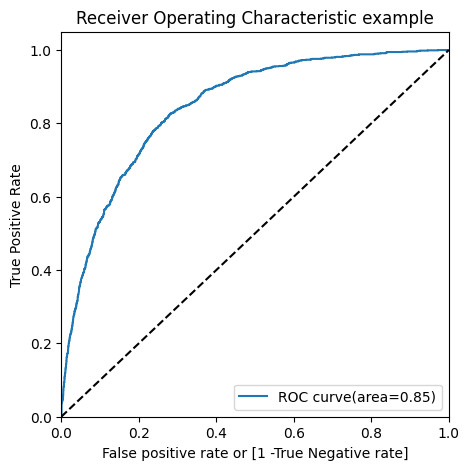

In [146]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_pred)

### 10 : finding optimal cutoff point

In [90]:
numbers =[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_pred,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.214458,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.326561,5790,0,1,1,1,1,0,0,0,0,0,0
6498,1,0.711236,6498,1,1,1,1,1,1,1,1,1,0,0
880,1,0.594675,880,1,1,1,1,1,1,1,0,0,0,0
2784,1,0.681539,2784,1,1,1,1,1,1,1,1,0,0,0


In [91]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [92]:
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1

    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.610727  0.942502  0.493260
0.2   0.2  0.717594  0.850816  0.670426
0.3   0.3  0.767777  0.775447  0.765062
0.4   0.4  0.794189  0.655789  0.843191
0.5   0.5  0.804551  0.531469  0.901238
0.6   0.6  0.798862  0.377622  0.948006
0.7   0.7  0.773263  0.182595  0.982393
0.8   0.8  0.747257  0.039627  0.997799
0.9   0.9  0.738521  0.000000  1.000000


<Axes: xlabel='prob'>

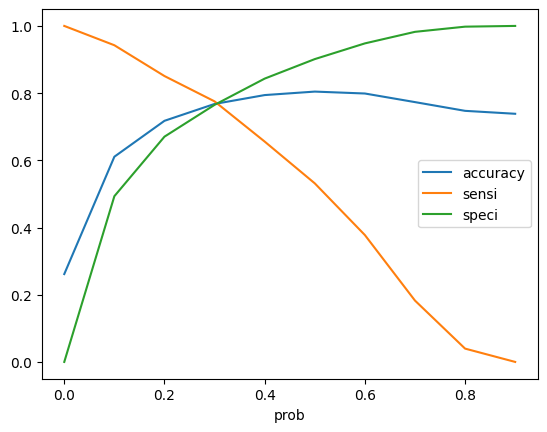

In [93]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [95]:
y_train_pred_final['final_predicted']=y_train_pred_final.Churn_pred.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()


,Churn,Churn_pred,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
879,0,0.214458,879,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,0.326561,5790,0,1,1,1,1,0,0,0,0,0,0,1
6498,1,0.711236,6498,1,1,1,1,1,1,1,1,1,0,0,1
880,1,0.594675,880,1,1,1,1,1,1,1,0,0,0,0,1
2784,1,0.681539,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [96]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8045509955302722


In [97]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted)
confusion2

array([[2781,  854],
       [ 289,  998]])

In [139]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [140]:
TP/float(TP+FN)


0.7754467754467754

In [141]:
TN/float(TN+FP)

0.7650618982118295

In [142]:
print(FP/float(TN+FP))
print(TP/float(TP+FP))
print(TN/float(TN+FN))

0.23493810178817057
0.5388768898488121
0.9058631921824104


### precision and recall

In [102]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted)
confusion

array([[2781,  854],
       [ 289,  998]])

In [104]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5388768898488121

In [105]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7754467754467754

In [106]:
from sklearn.metrics import precision_score,recall_score

In [107]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
precision for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and precision for both classes are computed, then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
precision for all `labels` 

In [108]:
precision_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.5388768898488121

### Precision and recall tradeoff

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
y_train_pred_final.Churn,y_train_pred_final.predicted

(879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: Churn, Length: 4922, dtype: int64,
 879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: predicted, Length: 4922, dtype: int64)

In [112]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_pred)

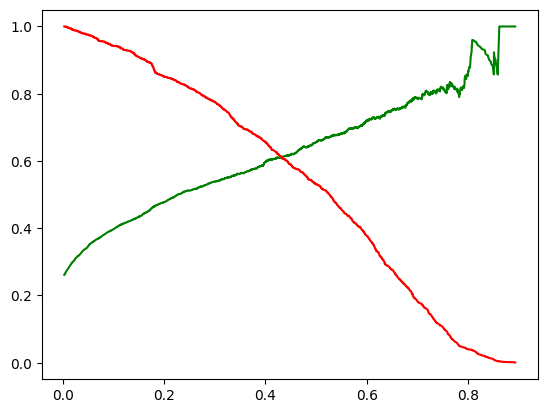

In [113]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

### 11 . Making prediction on test set

In [115]:
x_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

In [116]:
x_test=x_test[col]
x_test.head()

,tenure,PhoneService,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Mailed check,OS_Yes,TechSupport_Yes
942,-0.347623,1,0.499951,0,0,0,0,0,0
3730,0.999203,1,1.319685,0,0,0,0,0,0
1761,1.040015,1,-1.342374,0,0,1,0,0,0
2283,-1.286319,1,0.223935,0,0,0,1,0,0
1872,0.346196,1,-1.500335,0,0,1,0,0,0


In [117]:
x_test_sm=sm.add_constant(x_test)

In [118]:
y_test_pred=res.predict(x_test_sm)

In [119]:
y_test_pred[:10]

942     0.479744
3730    0.372118
1761    0.008749
2283    0.560175
1872    0.014355
1970    0.651544
2532    0.287224
1616    0.006703
2485    0.581785
5914    0.107227
dtype: float64

In [120]:
y_pred_1=pd.DataFrame(y_test_pred)

In [121]:
y_pred_1.head()

,0
942,0.479744
3730,0.372118
1761,0.008749
2283,0.560175
1872,0.014355


In [122]:
y_test_df=pd.DataFrame(y_test)

In [123]:
y_test_df['CustID']=y_test_df.index

In [124]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [125]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [126]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.479744
1,1,3730,0.372118
2,0,1761,0.008749
3,1,2283,0.560175
4,0,1872,0.014355


In [128]:
y_pred_final=y_pred_final.rename(columns={0:'Churn_pred'})

In [131]:
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','Churn_pred'])

In [132]:
y_pred_final.head()

,CustID,Churn,Churn_pred
0,942,0,0.479744
1,3730,1,0.372118
2,1761,0,0.008749
3,2283,1,0.560175
4,1872,0,0.014355


In [134]:
y_pred_final['final_predicted']=y_pred_final.Churn_pred.map(lambda x: 1 if x > 0.42 else 0)

In [135]:
y_pred_final.head()

,CustID,Churn,Churn_pred,final_predicted
0,942,0,0.479744,1
1,3730,1,0.372118,0
2,1761,0,0.008749,0
3,2283,1,0.560175,1
4,1872,0,0.014355,0


In [136]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.7805687203791469

In [137]:
confusion3=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
confusion3

array([[1291,  237],
       [ 226,  356]])

In [138]:
TP=confusion3[1,1]
TN=confusion3[0,0]
FP=confusion3[0,1]
FN=confusion3[1,0]

In [143]:
TP/float(TP+FN)

0.7754467754467754

In [144]:
TN/float(TN+FP)

0.7650618982118295